<a href="https://colab.research.google.com/github/lawlli/AI_ML_TASKS_INTERNSHIP_2024/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset:
legend_data = pd.read_excel("/content/segmentation data legend.xlsx", engine='openpyxl')
segmentation_data = pd.read_csv("/content/segmentation data.csv")

In [ ]:
# Display the first few rows of the dataset
segmentation_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
# Get summary statistics of the dataset
segmentation_data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
# Check for missing values
print(segmentation_data.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


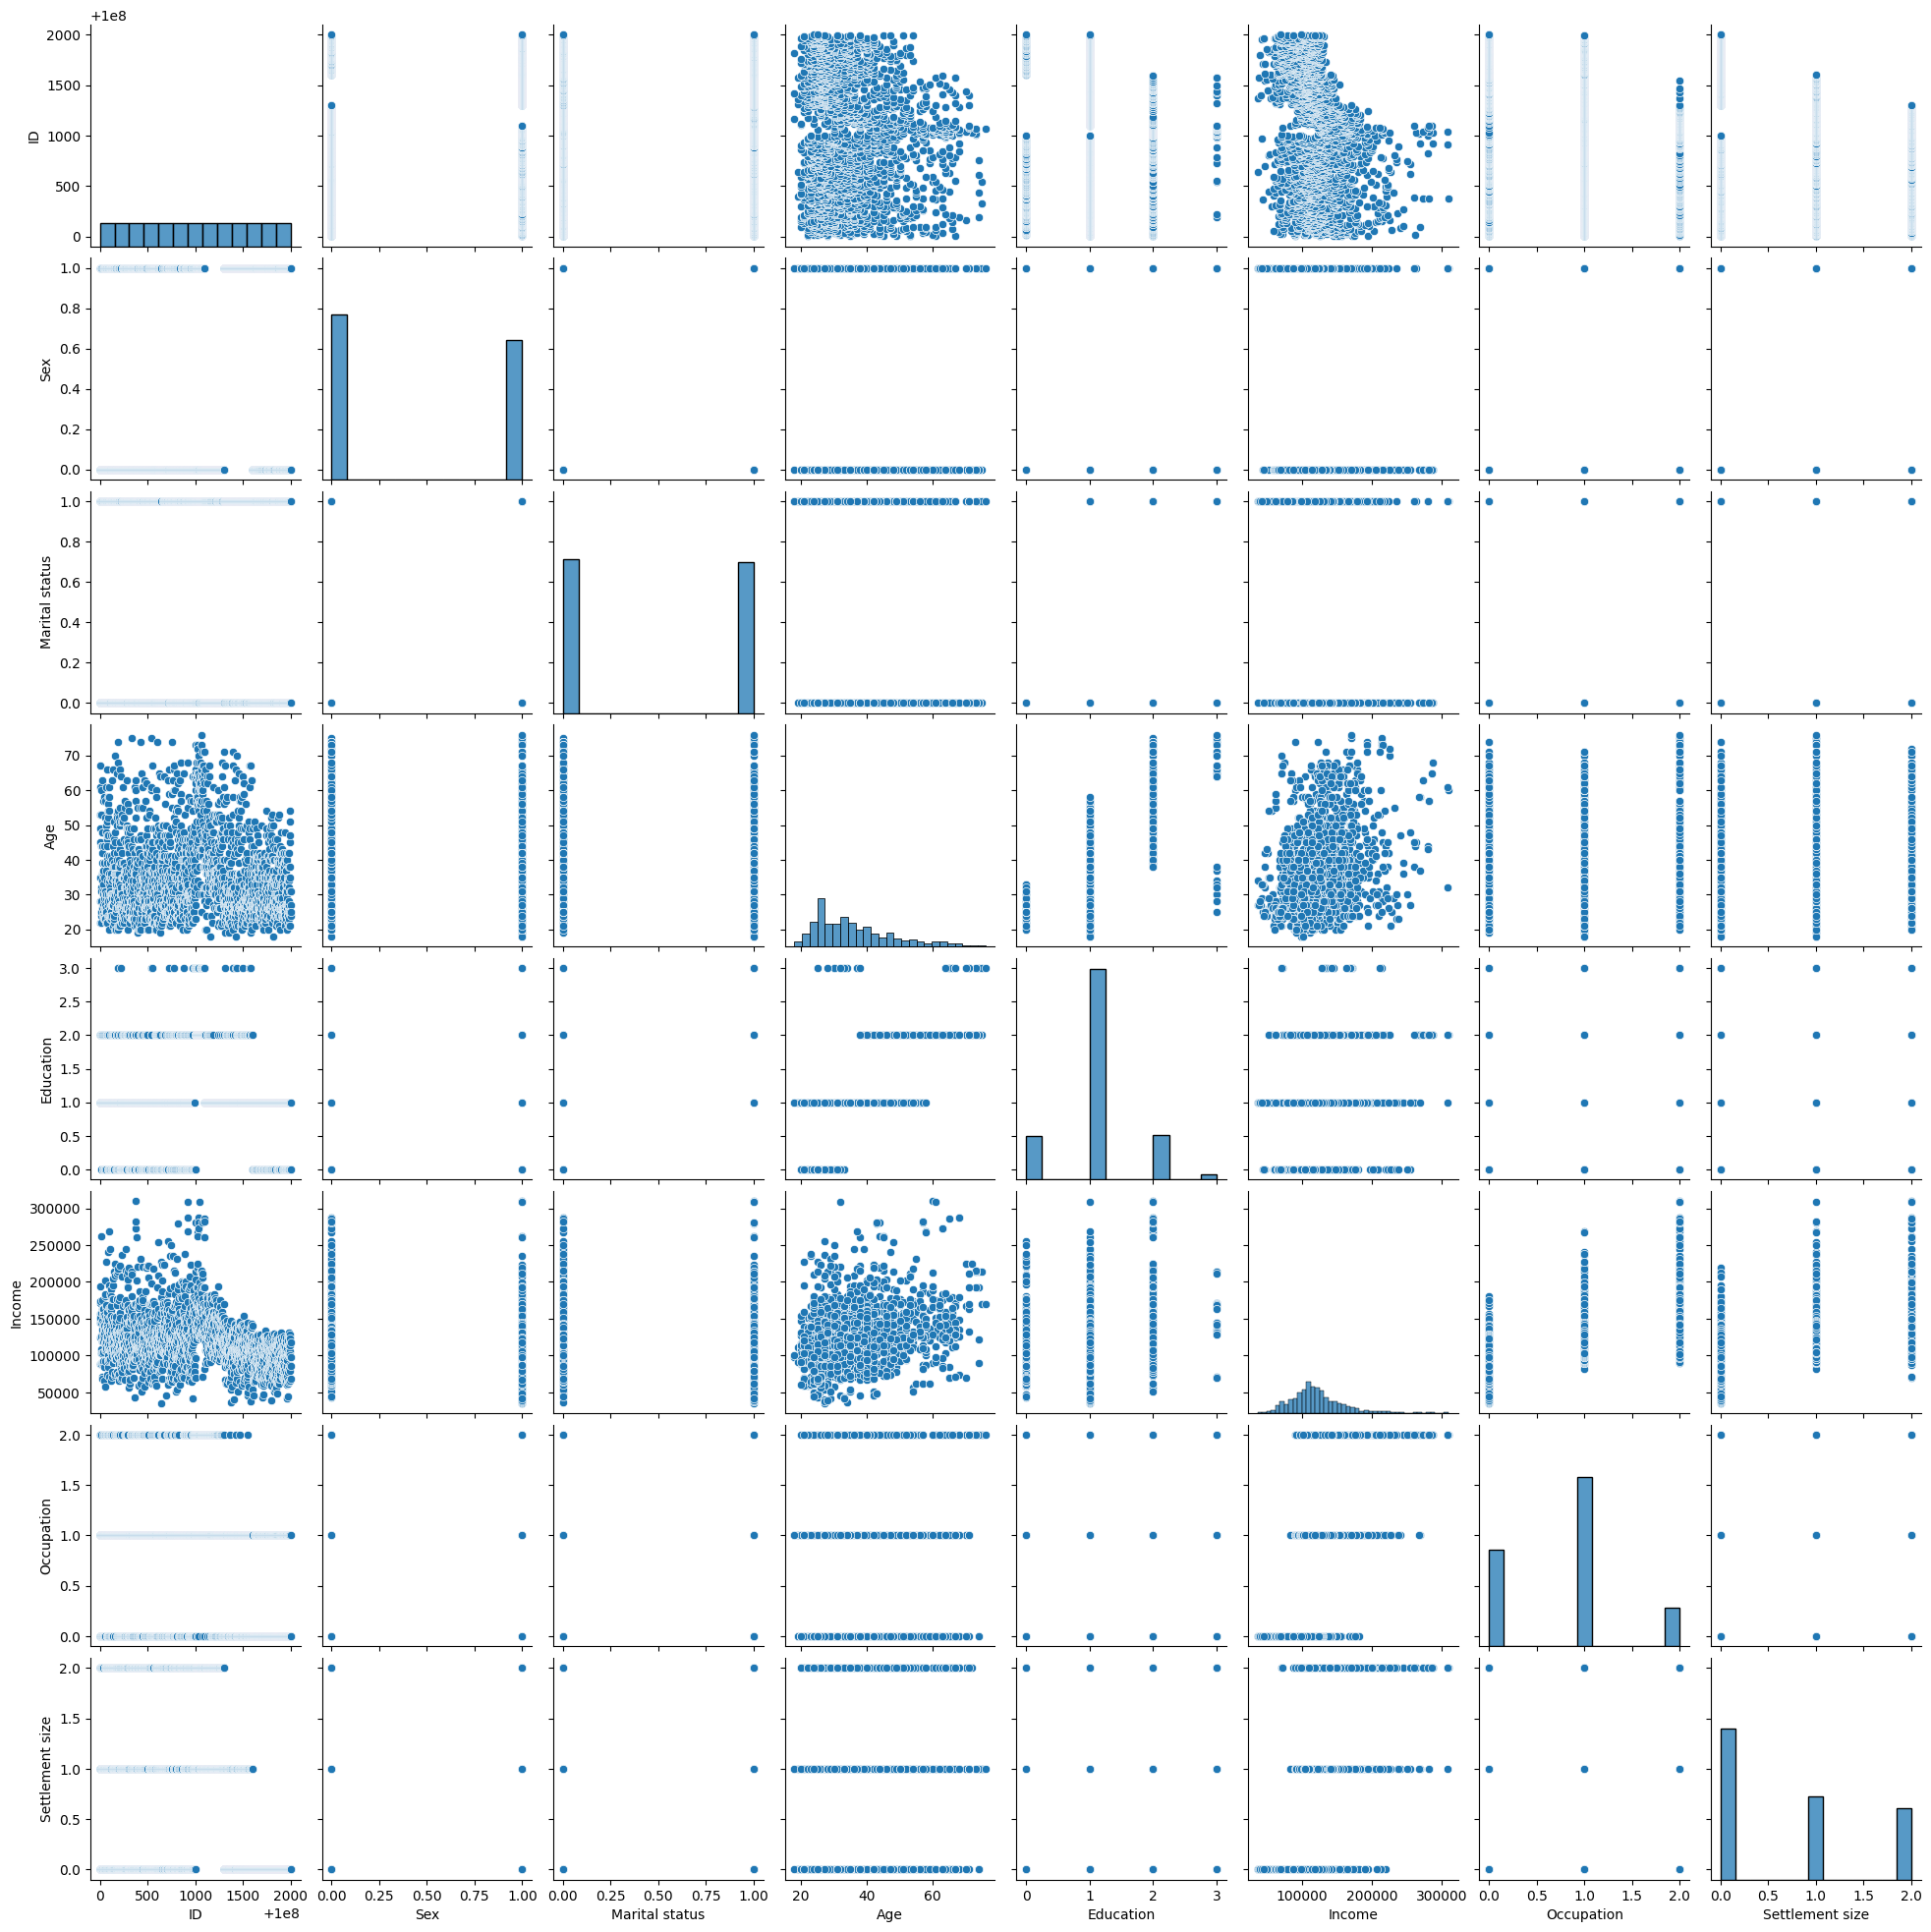

In [ ]:
# Visualize the distribution of numerical features
sns.pairplot(segmentation_data)
plt.show()

In [ ]:
# Assuming 'ID' is not a useful feature for clustering
X = segmentation_data.drop(['ID'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

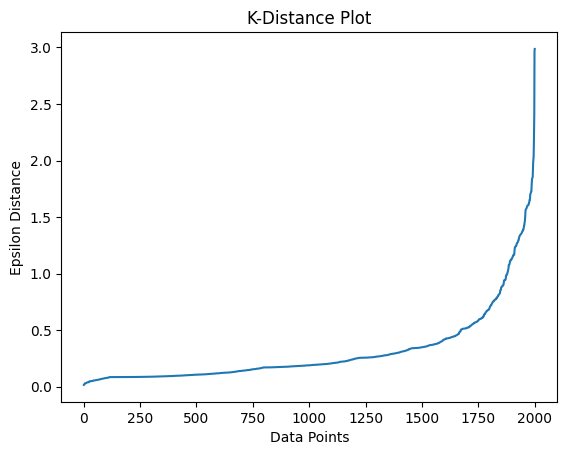

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Assuming X_scaled is your standardized feature matrix
neighbors = NearestNeighbors(n_neighbors=4)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

distances = distances[:, -1]  # Take the distance to the k-th nearest neighbor
distances = sorted(distances)

plt.plot(list(range(1, len(distances) + 1)), distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon Distance')
plt.title('K-Distance Plot')
plt.show()

In [ ]:
# Assuming X_scaled is your standardized feature matrix
num_samples = X_scaled.shape[0]
max_neighbors = num_samples - 1

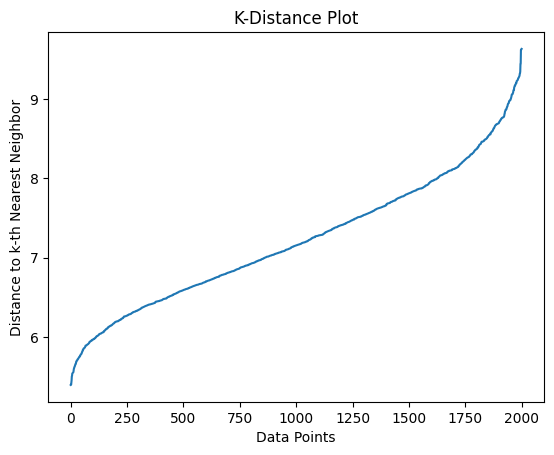

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=max_neighbors)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

# Plot the sorted distances to the k-th nearest neighbor
plt.plot(list(range(0, max_neighbors + 1)), sorted(distances[:, -1]))
plt.xlabel('Data Points')
plt.ylabel('Distance to k-th Nearest Neighbor')
plt.title('K-Distance Plot')
plt.show()

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
segmentation_data['Cluster'] = dbscan.fit_predict(X_scaled)

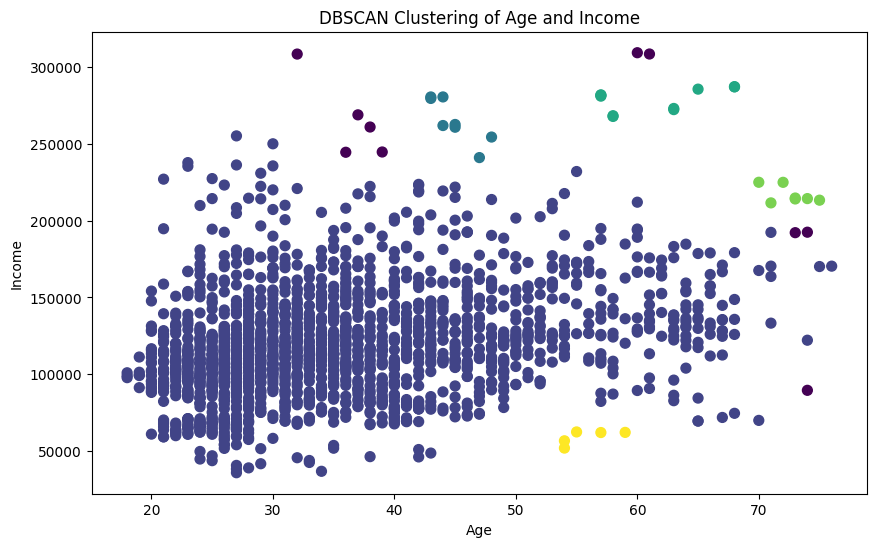

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Assuming 'segmentation_data' is your DataFrame
# Extracting relevant features
X = segmentation_data[['Age', 'Income']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
eps = 0.5  # You may adjust this based on your data
min_samples = 5  # You may adjust this based on your data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
segmentation_data['Cluster'] = dbscan.fit_predict(X_scaled)

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Income'], c=segmentation_data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

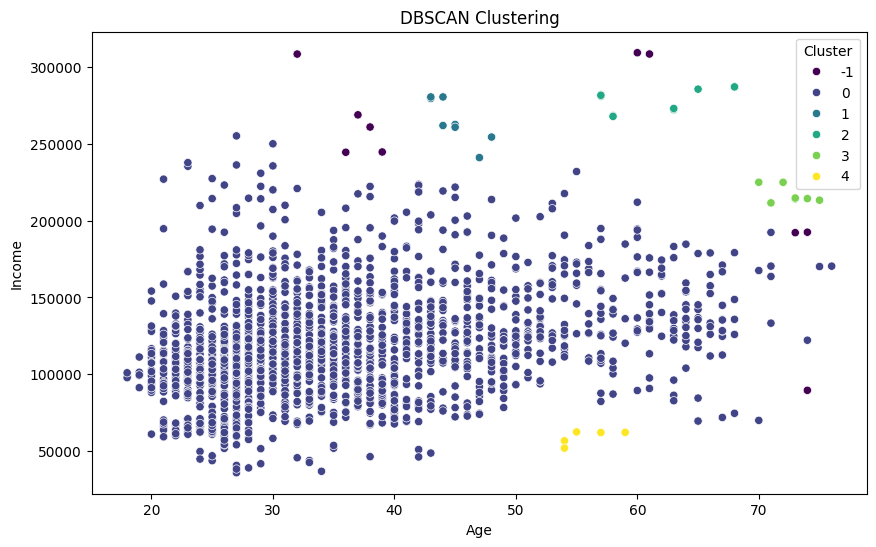

In [ ]:
#two features for visualization
feature1 = 'Age'
feature2 = 'Income'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='Cluster', data=segmentation_data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()